In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set = pd.read_csv('train.csv')
train_set.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


## EDA

In [3]:
train_set.shape

(50882, 14)

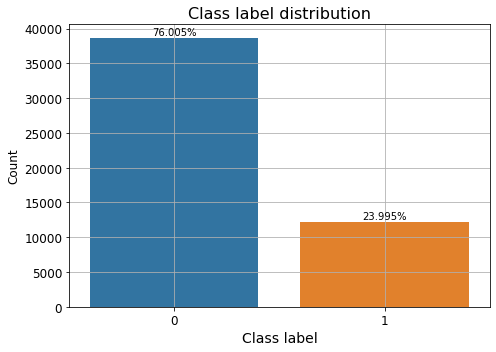

Number of data points in class 1 : 12209 ( 23.995 %)
Number of data points in class 0 : 38673 ( 76.005 %)


In [14]:
# distribution of class labels
# https://stackoverflow.com/questions/63603222/adding-percentages-to-sns-countplot-how-do-i-show-percentages-for-two-values-w

plt.figure(figsize=(7, 5))
ax = sns.countplot(data=train_set, x='Response')
plt.xticks(size=12)
plt.xlabel('Class label', size=14)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.title('Class label distribution', size=16)

total = len(train_set)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.3f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.grid()
plt.show()

class_distribution = train_set['Response'].value_counts().sort_index()
sorted_yi = np.argsort(class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i , ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/train_set.shape[0]*100), 3), '%)')

In [15]:
train_set.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [17]:
train_set.duplicated().any()

False

### Uni-variate Analysis :-

In [18]:
# to plot count plot with percentage
def count_plot(data, col1, xname, yname, title, fig, col2='Response'):
    '''This function is used to plot a count plot, with percentage displayed on top of each bin'''
    
    # https://stackoverflow.com/questions/63603222/adding-percentages-to-sns-countplot-how-do-i-show-percentages-for-two-values-w
    plt.figure(figsize=fig)
    ax = sns.countplot(data=data, x=col1, hue=col2, hue_order=[0, 1])
    plt.xticks(size=12)
    plt.xlabel(xname, size=14)
    plt.yticks(size=12)
    plt.ylabel(yname, size=12)
    plt.title(title, size=16)
    
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', size=12)
    plt.tight_layout()
    plt.grid()
    plt.show()

In [19]:
# to get category wise percentage and total churn
def countplot_analysis(data, col1, xname, yname, title, fig, col2='Response', top=False):
    '''This function is used to display a table with the total and average churned users'''
    
    # https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # https://stackoverflow.com/a/19385591/4084039
    temp['total_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(total_users='count')).reset_index()['total_users']
    temp['average_lead_users'] = pd.DataFrame(data.groupby(col1)[col2].agg(average_lead_users='mean')).reset_index()['average_lead_users']
    
    temp.sort_values(by=['total_users'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    count_plot(data, col1, xname, yname, title, fig, col2)
    print(temp)

### For city code :-

In [22]:
print('All unique city codes: ', train_set['City_Code'].unique())
print('*' * 50)
print('Total number of unique city codes: ', len(train_set['City_Code'].unique()))

All unique city codes:  ['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
**************************************************
Total number of unique city codes:  36


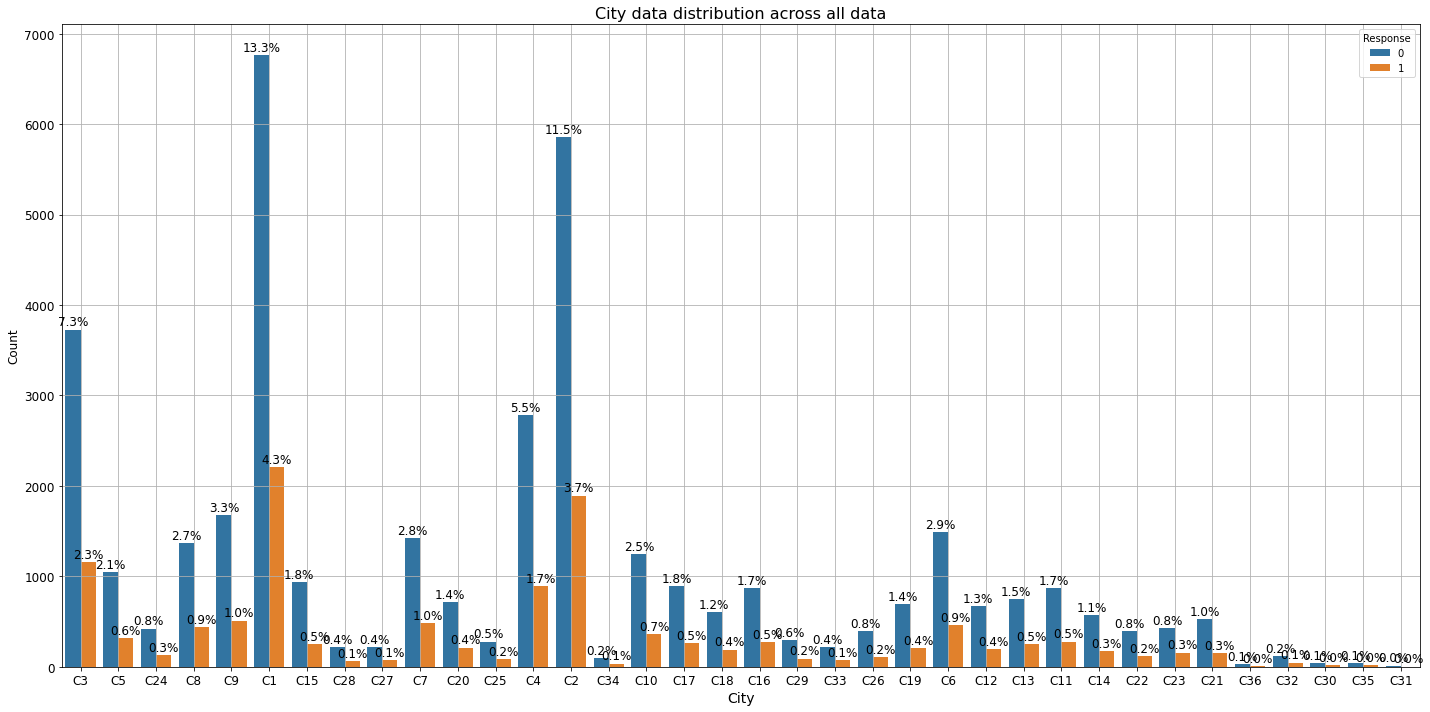

   City_Code  Response  total_users  average_lead_users
0         C1      2208         8973            0.246072
11        C2      1893         7747            0.244353
22        C3      1161         4889            0.237472
30        C4       889         3671            0.242168
35        C9       510         2185            0.233410
32        C6       460         1950            0.235897
33        C7       484         1910            0.253403
34        C8       437         1806            0.241971
1        C10       364         1611            0.225947
31        C5       314         1364            0.230205
6        C15       253         1186            0.213322
8        C17       265         1159            0.228645
2        C11       279         1147            0.243243
7        C16       269         1135            0.237004
4        C13       255         1005            0.253731
12       C20       212          926            0.228942
10       C19       208          899            0

In [20]:
countplot_analysis(train_set, 'City_Code', 'City', 'Count', 'City data distribution across all data', (20, 10),'Response', False)

### For region code :-

In [23]:
print('All unique region codes: ', train_set['Region_Code'].unique())
print('*' * 50)
print('Total number of unique region codes: ', len(train_set['Region_Code'].unique()))

All unique region codes:  [3213 1117 3732 ... 5326 6149 5450]
**************************************************
Total number of unique region codes:  5316


<AxesSubplot:xlabel='Region_Code'>

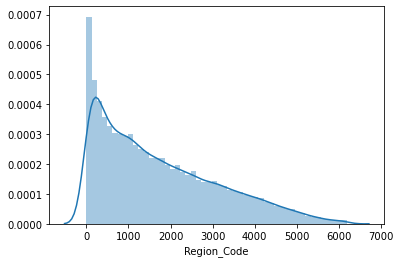

In [24]:
sns.distplot(train_set['Region_Code'])

### For accomodation type :-

In [25]:
print('All unique accomodation type: ', train_set['Accomodation_Type'].unique())
print('*' * 50)
print('Total number of unique accomodation type: ', len(train_set['Accomodation_Type'].unique()))

All unique accomodation type:  ['Rented' 'Owned']
**************************************************
Total number of unique accomodation type:  2


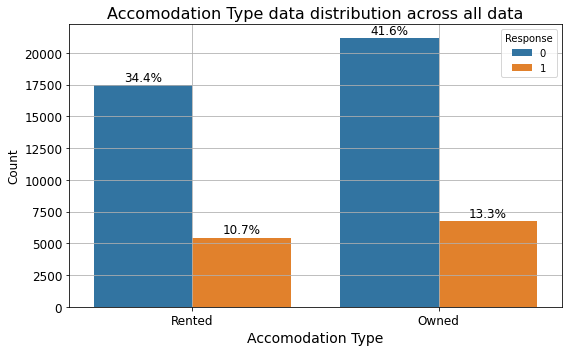

  Accomodation_Type  Response  total_users  average_lead_users
0             Owned      6763        27951            0.241959
1            Rented      5446        22931            0.237495


In [28]:
countplot_analysis(train_set, 'Accomodation_Type', 'Accomodation Type', 'Count', 'Accomodation Type data distribution across all data', (8, 5),'Response', False)

### For reco insurance type :-

In [29]:
print('All unique reco insurance type: ', train_set['Reco_Insurance_Type'].unique())
print('*' * 50)
print('Total number of unique reco insurance type: ', len(train_set['Reco_Insurance_Type'].unique()))

All unique reco insurance type:  ['Individual' 'Joint']
**************************************************
Total number of unique reco insurance type:  2


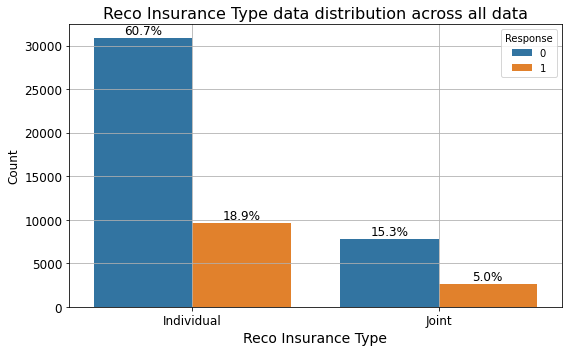

  Reco_Insurance_Type  Response  total_users  average_lead_users
0          Individual      9640        40536            0.237813
1               Joint      2569        10346            0.248309


In [27]:
countplot_analysis(train_set, 'Reco_Insurance_Type', 'Reco Insurance Type', 'Count', 'Reco Insurance Type data distribution across all data', (8,5),'Response', False)

### For upper age :-

In [30]:
print('Total number of unique upper age: ', len(train_set['Upper_Age'].unique()))

Total number of unique upper age:  58


<AxesSubplot:xlabel='Response', ylabel='Upper_Age'>

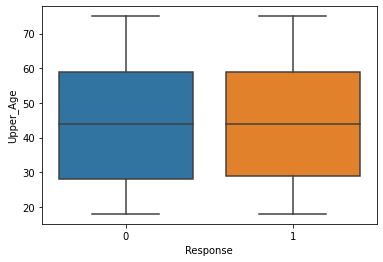

In [33]:
sns.boxplot(x='Response', y='Upper_Age', data=train_set)

### For lower age :-

In [34]:
print('Total number of unique lower age: ', len(train_set['Lower_Age'].unique()))

Total number of unique lower age:  60


<AxesSubplot:xlabel='Response', ylabel='Lower_Age'>

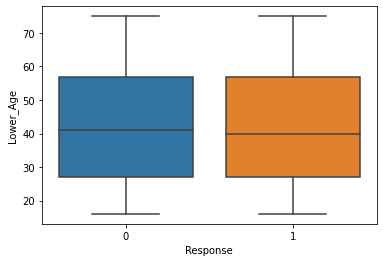

In [35]:
sns.boxplot(x='Response', y='Lower_Age', data=train_set)

### For is spouse :-

In [37]:
print('All unique spouse states: ', train_set['Is_Spouse'].unique())
print('*' * 50)
print('Total number of unique spouse states: ', len(train_set['Is_Spouse'].unique()))

All unique spouse states:  ['No' 'Yes']
**************************************************
Total number of unique spouse states:  2


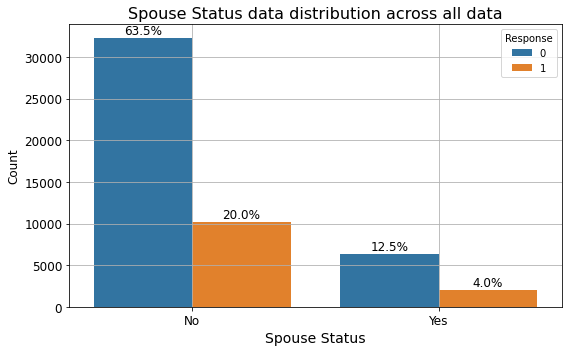

  Is_Spouse  Response  total_users  average_lead_users
0        No     10157        42460            0.239213
1       Yes      2052         8422            0.243648


In [38]:
countplot_analysis(train_set, 'Is_Spouse', 'Spouse Status', 'Count', 'Spouse Status data distribution across all data', (8,5),'Response', False)

### For health indicator :-

In [40]:
print('All unique health indicators: ', train_set['Health Indicator'].unique())
print('*' * 50)
print('Total number of unique health indicators: ', len(train_set['Health Indicator'].unique()))

All unique health indicators:  ['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
**************************************************
Total number of unique health indicators:  10


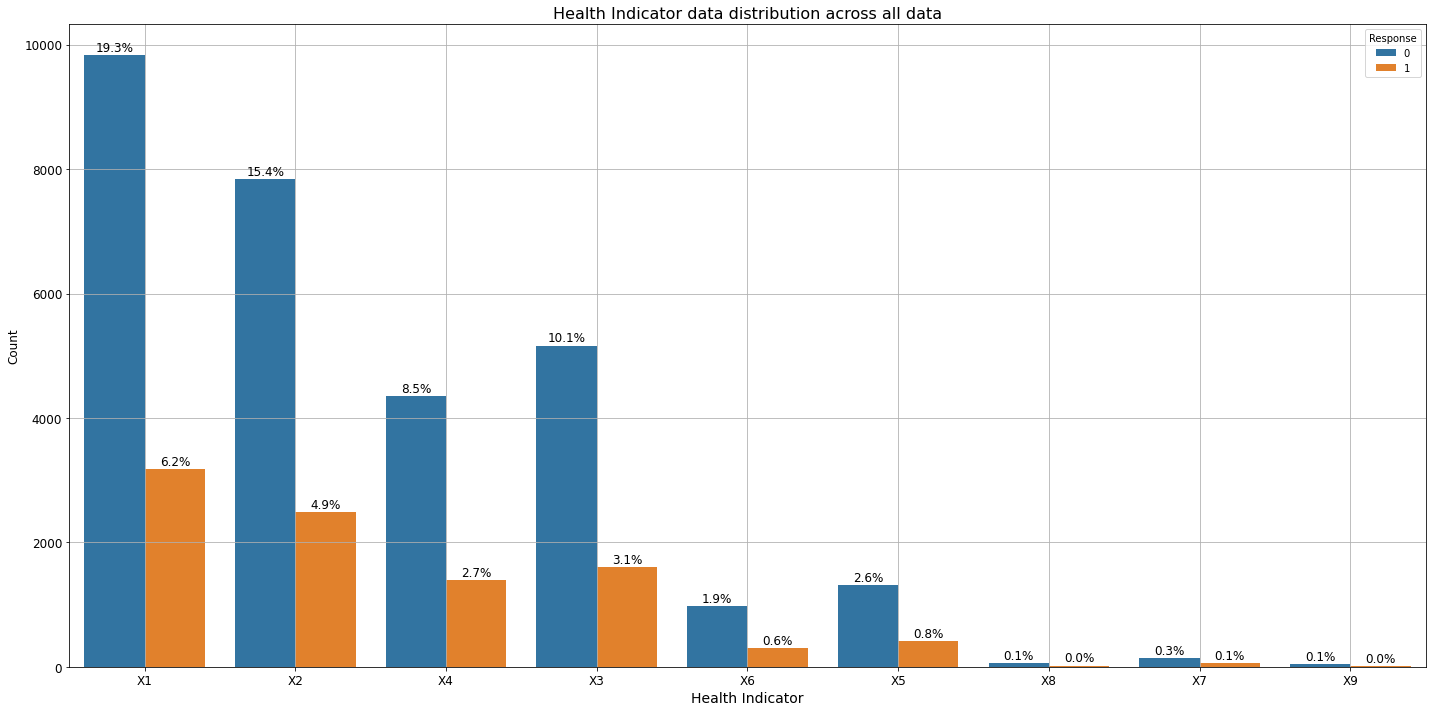

  Health Indicator  Response  total_users  average_lead_users
0               X1      3176        13010            0.244120
1               X2      2491        10332            0.241096
2               X3      1599         6762            0.236469
3               X4      1396         5743            0.243079
4               X5       408         1727            0.236248
5               X6       307         1280            0.239844
6               X7        62          196            0.316327
7               X8        18           78            0.230769
8               X9        14           63            0.222222


In [42]:
countplot_analysis(train_set, 'Health Indicator', 'Health Indicator', 'Count', 'Health Indicator data distribution across all data', (20,10),'Response', False)

### For holding policy duration :-

In [43]:
print('All unique holding policy duration: ', train_set['Holding_Policy_Duration'].unique())
print('*' * 50)
print('Total number of unique holding policy duration: ', len(train_set['Holding_Policy_Duration'].unique()))

All unique holding policy duration:  ['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
**************************************************
Total number of unique holding policy duration:  16


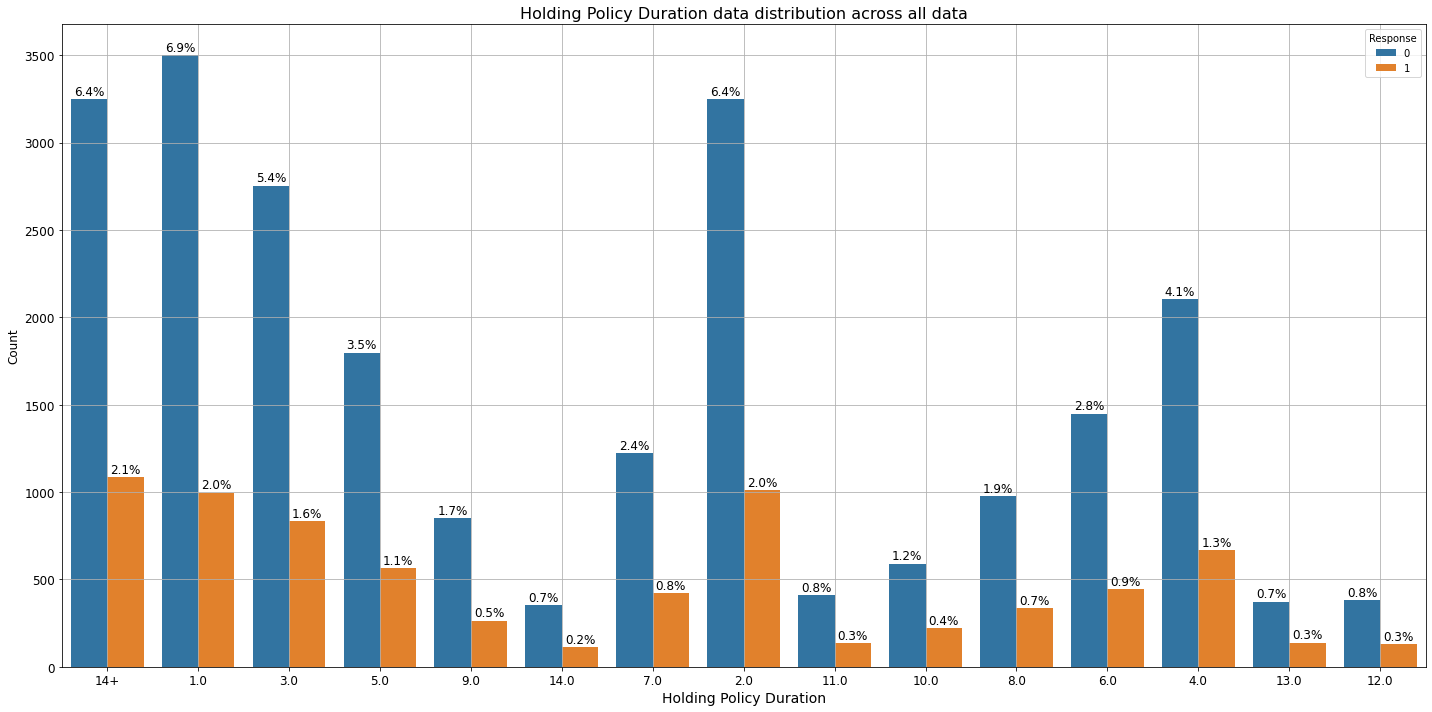

   Holding_Policy_Duration  Response  total_users  average_lead_users
0                      1.0       997         4499            0.221605
5                      14+      1087         4335            0.250750
7                      2.0      1011         4260            0.237324
8                      3.0       832         3586            0.232013
9                      4.0       667         2771            0.240707
10                     5.0       563         2362            0.238357
11                     6.0       445         1894            0.234952
12                     7.0       423         1645            0.257143
13                     8.0       338         1316            0.256839
14                     9.0       265         1114            0.237882
1                     10.0       222          813            0.273063
2                     11.0       137          546            0.250916
3                     12.0       130          513            0.253411
4                   

In [44]:
countplot_analysis(train_set, 'Holding_Policy_Duration', 'Holding Policy Duration', 'Count', 'Holding Policy Duration data distribution across all data', (20,10),'Response', False)

### For holding policy type :-

In [45]:
print('All unique holding policy type: ', train_set['Holding_Policy_Type'].unique())
print('*' * 50)
print('Total number of unique holding policy type: ', len(train_set['Holding_Policy_Type'].unique()))

All unique holding policy type:  [ 3. nan  1.  4.  2.]
**************************************************
Total number of unique holding policy type:  5


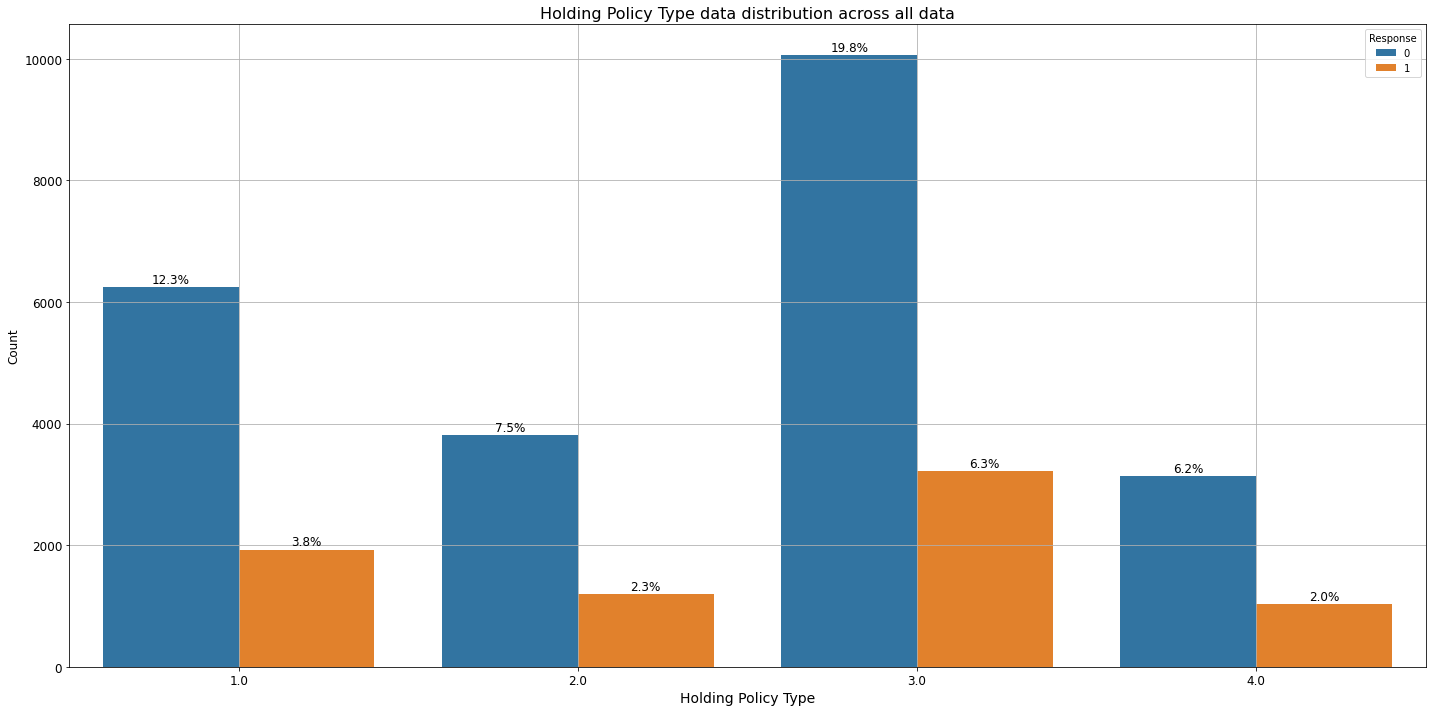

   Holding_Policy_Type  Response  total_users  average_lead_users
2                  3.0      3217        13279            0.242262
0                  1.0      1927         8173            0.235776
1                  2.0      1190         5005            0.237762
3                  4.0      1036         4174            0.248203


In [46]:
countplot_analysis(train_set, 'Holding_Policy_Type', 'Holding Policy Type', 'Count', 'Holding Policy Type data distribution across all data', (20,10),'Response', False)

### For reco policy cat :-

In [47]:
print('All unique reco policy category: ', train_set['Reco_Policy_Cat'].unique())
print('*' * 50)
print('Total number of unique reco policy category: ', len(train_set['Reco_Policy_Cat'].unique()))

All unique reco policy category:  [22 19 16 17  1 18 21 13 20  9  2  4 12  6 14 11  3  8  7 10 15  5]
**************************************************
Total number of unique reco policy category:  22


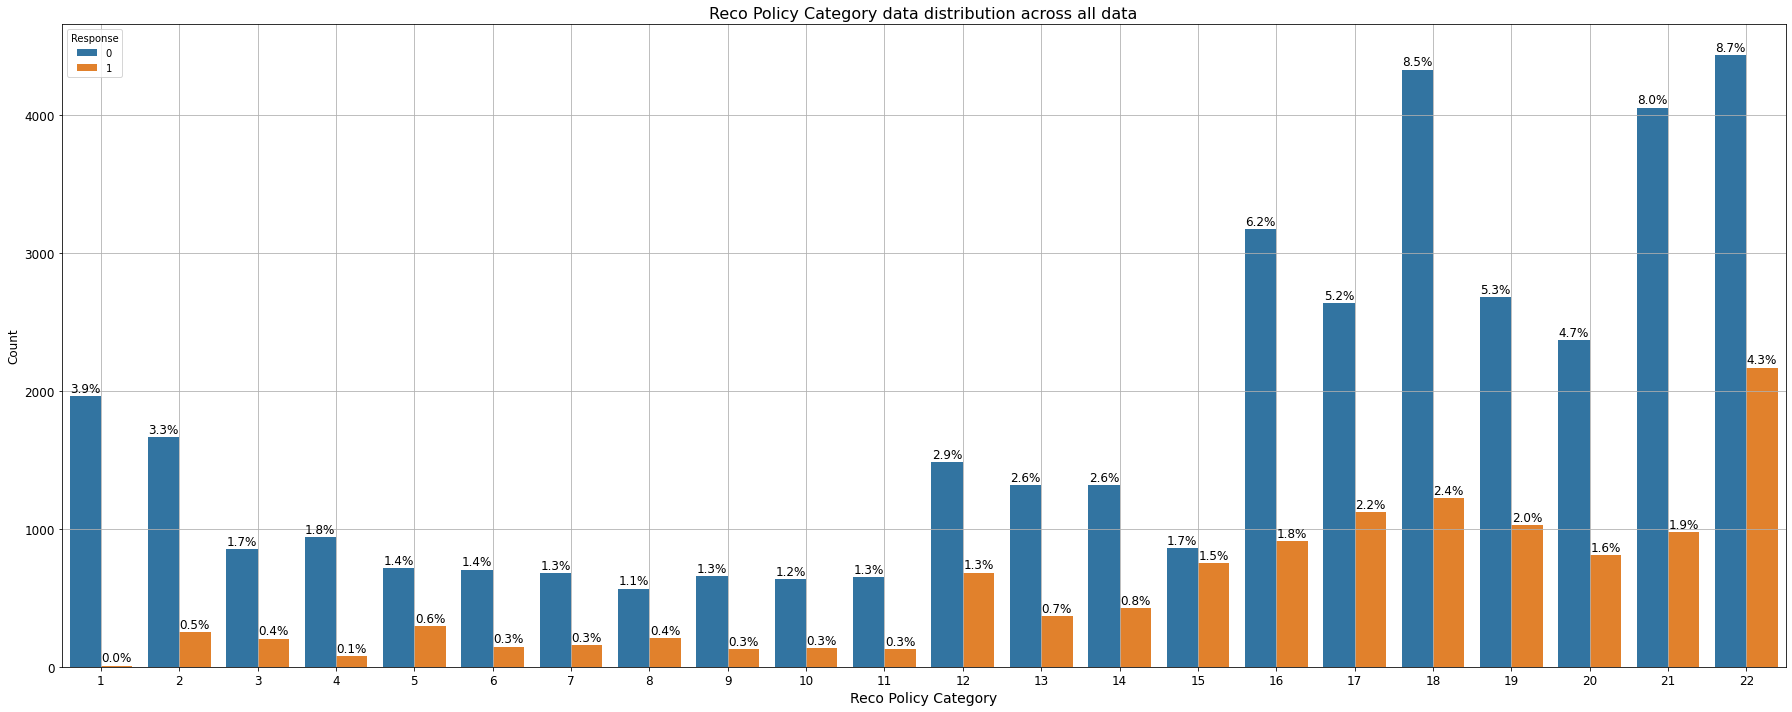

    Reco_Policy_Cat  Response  total_users  average_lead_users
21               22      2168         6602            0.328385
17               18      1225         5553            0.220601
20               21       974         5027            0.193754
15               16       913         4084            0.223555
16               17      1121         3756            0.298456
18               19      1027         3708            0.276969
19               20       810         3177            0.254958
11               12       683         2168            0.315037
0                 1         8         1967            0.004067
1                 2       254         1917            0.132499
13               14       425         1742            0.243972
12               13       368         1684            0.218527
14               15       752         1615            0.465635
2                 3       205         1059            0.193579
3                 4        75         1015            0

In [48]:
countplot_analysis(train_set, 'Reco_Policy_Cat', 'Reco Policy Category', 'Count', 'Reco Policy Category data distribution across all data', (25,10),'Response', False)

### For Reco Policy Premium

In [50]:
print('All unique Reco Policy Premium: ', train_set['Reco_Policy_Premium'].unique())
print('*' * 50)
print('Total number of unique Reco Policy Premium: ', len(train_set['Reco_Policy_Premium'].unique()))

All unique Reco Policy Premium:  [11628. 30510.  7450. ... 25726.  6156. 11374.]
**************************************************
Total number of unique Reco Policy Premium:  6977


<AxesSubplot:xlabel='Response', ylabel='Reco_Policy_Premium'>

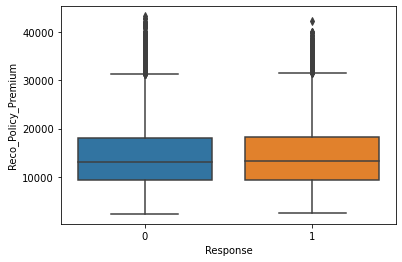

In [51]:
sns.boxplot(x='Response', y='Reco_Policy_Premium', data=train_set)

In [54]:
# getting 0th to 100th percentiles of bd feature
for i in range(0, 110, 10):
    print(i, 'th percentile value is: ', np.nanpercentile(train_set['Reco_Policy_Premium'], i))
print('*' * 50)
# getting 90th to 100th percentiles of bd feature
for i in range(90, 101, 1):
    print(i, 'th percentile value is: ', np.nanpercentile(train_set['Reco_Policy_Premium'], i))
print('*' * 50)
# getting 99.1th to 100th percentile to obtain max reasonable age
for i in range(1, 11, 1):
    print(99+(i/10), 'th percentile value is: ', np.nanpercentile(train_set['Reco_Policy_Premium'], 99+(i/10)))

0 th percentile value is:  2280.0
10 th percentile value is:  6480.0
20 th percentile value is:  8400.0
30 th percentile value is:  9996.0
40 th percentile value is:  11502.0
50 th percentile value is:  13178.0
60 th percentile value is:  14976.0
70 th percentile value is:  16980.0
80 th percentile value is:  19432.0
90 th percentile value is:  23167.2
100 th percentile value is:  43350.4
**************************************************
90 th percentile value is:  23167.2
91 th percentile value is:  23740.75199999999
92 th percentile value is:  24402.0
93 th percentile value is:  25152.0
94 th percentile value is:  25916.8
95 th percentile value is:  26852.0
96 th percentile value is:  27910.4
97 th percentile value is:  29163.424
98 th percentile value is:  30643.199999999997
99 th percentile value is:  33024.0
100 th percentile value is:  43350.4
**************************************************
99.1 th percentile value is:  33293.52419999996
99.2 th percentile value is:  33587.2
